In [11]:
!pip install statsmodels==0.12.2
!pip install pmdarima

#**Import necessary modules/ libs**

In [39]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from datetime import datetime

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error,mean_absolute_error

from pmdarima.arima import auto_arima
from prettytable import PrettyTable

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import LSTM

import warnings
warnings.simplefilter("ignore")

#**Load 4 stock datasets**

In [15]:
ibm = pdr.DataReader('IBM', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))
aapl = pdr.DataReader('AAPL', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))
fb = pdr.DataReader('FB', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))
googl = pdr.DataReader('GOOGL', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))

ibm_mse, ibm_r2score = [], []
aapl_mse, aapl_r2score = [], []
fb_mse, fb_r2score = [], []
googl_mse, googl_r2score = [], []

#**[1] Analysis of IBM dataset**

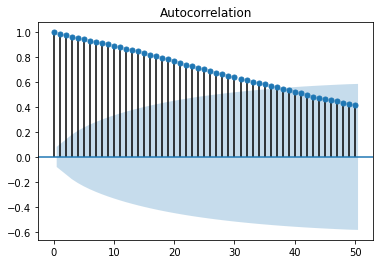

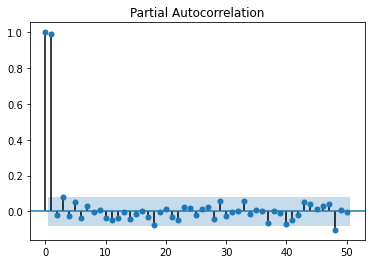

In [5]:
plot_acf(ibm.Close, lags=50, use_vlines=True)
plt.show()

plot_pacf(ibm.Close, lags=50, use_vlines=True)
plt.show()

*From PACF, p = 2*

#**IBM Stock prediction using ARIMA(2, 0, 0)**

Test MSE: 3.106
Test R2-Score: 0.946


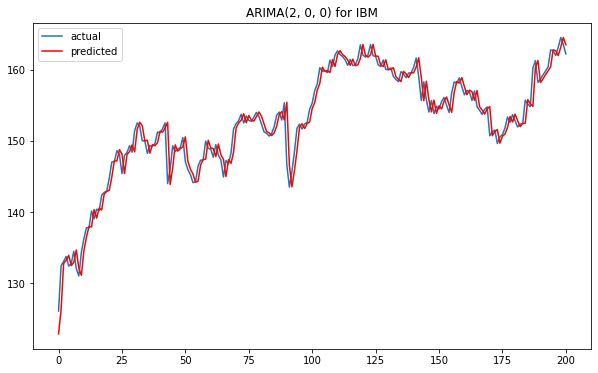

In [16]:
X = ibm['Close'].values
size = int(len(X) * 0.66)
train, test = X[0 : size], X[size : len(X)]
history = [x for x in train]
preds = []

# Apply ARIMA(2, 0, 0) model for stock prediction
for t in range(len(test)):
    model = ARIMA(history, order=(2, 0, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    preds.append(yhat)
    obs = test[t]
    history.append(obs)

mse = mean_squared_error(test, preds)
r2score = r2_score(test, preds)
print('Test MSE: %.3f' % mse)
ibm_mse.append(mse)
ibm_r2score.append(r2score)
print('Test R2-Score: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(test, label='actual')
plt.plot(preds, color='red', label='predicted')
ax.legend(loc='upper left')
plt.title('ARIMA(2, 0, 0) for IBM')
plt.show()

In [17]:
ibm.reset_index(inplace=True)
ibm.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [20]:
# Get best values of p, d, q with lowest AIC
model_arima= auto_arima(train, trace=True, error_action='ignore', start_p=1, start_q=1, max_p=5, max_q=5,
                   suppress_warnings=True, stepwise=False, seasonal=False)
    
print(model_arima.summary())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1664.466, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1666.457, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1664.829, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1666.576, Time=0.11 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1668.158, Time=0.14 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1669.387, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1666.459, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1660.343, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1661.520, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1662.601, Time=0.35 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1664.479, Time=0.44 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1665.054, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1661.616, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1662.361, Time=0.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1664.361, Time=0.71 sec
 ARIMA(3,1

#**IBM Stock prediction using best ARIMA(1, 1, 1)**

Test MSE: 3.265
Test R2-Score: 0.943


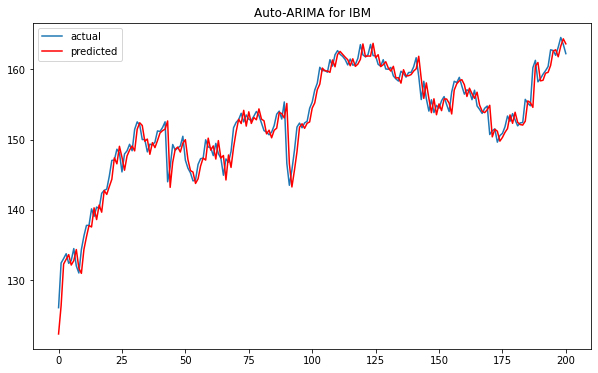

In [21]:
X = ibm['Close'].values
size = int(len(X) * 0.66)
train, test = X[0 : size], X[size : len(X)]
history = [x for x in train]
preds = []

# Apply ARIMA(1, 1, 1) model for stock prediction
for t in range(len(test)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    preds.append(yhat)
    obs = test[t]
    history.append(obs)

mse = mean_squared_error(test, preds)
r2score = r2_score(test, preds)
print('Test MSE: %.3f' % mse)
ibm_mse.append(mse)
ibm_r2score.append(r2score)
print('Test R2-Score: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(test, label='actual')
plt.plot(preds, color='red', label='predicted')
ax.legend(loc='upper left')
plt.title('Auto-ARIMA for IBM')
plt.show()

#**IBM Stock prediction using SARIMA**

In [23]:
# Get best values of p, d, q with lowest AIC
model_sarima = auto_arima(train, trace=True, error_action='ignore', start_p=0, start_q=2, max_p=5, max_q=5, m=12,
                   suppress_warnings=True, stepwise=True, seasonal=True)

print(model_sarima.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=1668.715, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1664.466, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1668.348, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1668.354, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1665.123, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1666.357, Time=0.13 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1666.364, Time=0.13 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1668.317, Time=0.63 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1666.459, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1666.457, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1660.343, Time=0.25 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1662.338, Time=0.66 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1662.339, Time=0.85 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1664.343, Time=1.08 sec
 ARIMA(2,1,1)(0,0,0

#**IBM Stock prediction using best SARIMA(1, 1, 1) and seasonality=12**

Test MSE: 3.215
Test R2-Score: 0.944


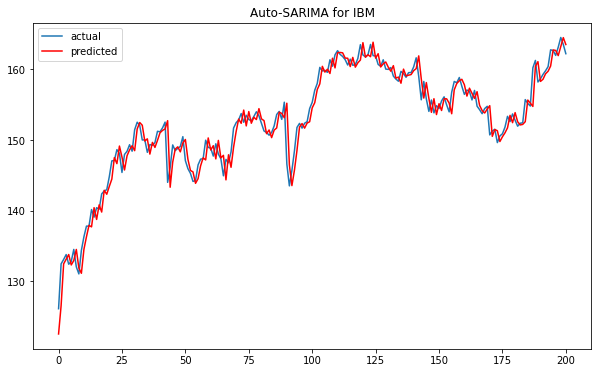

In [24]:
X = ibm['Close'].values
size = int(len(X) * 0.66)
train, test = X[0 : size], X[size : len(X)]
history = [x for x in train]
preds = []

for t in range(len(test)):
    model = SARIMAX(history, order=(1,1,1), seasonal_order=(0,0,0,12))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    preds.append(yhat)
    obs = test[t]
    history.append(obs)

# Apply SARIMA(1, 1, 1) with seasonality=12 model for stock prediction
mse = mean_squared_error(test, preds)
r2score = r2_score(test, preds)
print('Test MSE: %.3f' % mse)
ibm_mse.append(mse)
ibm_r2score.append(r2score)
print('Test R2-Score: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(test, label='actual')
plt.plot(preds, color='red', label='predicted')   
ax.legend(loc='upper left')
plt.title('Auto-SARIMA for IBM')
plt.show()

#**Prepare IBM dataset for ML based predictions**

In [34]:
size = int(len(ibm.Close) * 0.66)
train, test = ibm[0 : size], ibm[size : len(X)]
len(train)

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
			      break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)
 
raw_seq = ibm.Close
trainLen = 388
train = raw_seq[:trainLen]
test = raw_seq[trainLen:]
n_steps = 3

# Split into samples
X, y = split_sequence(train, n_steps)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

**Simple RNN Model**

Test MSE: 3.744
Test R2-Score: 0.926


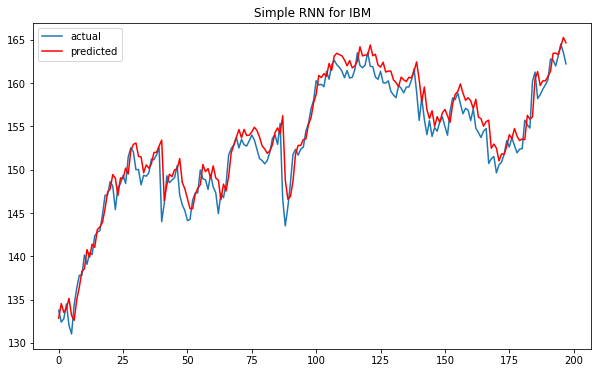

In [35]:
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=500, verbose=0)
test = test.reset_index(drop=True)

# Demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)
r2score = r2_score(y_test, yhat)
error = mean_squared_error(y_test, yhat)
ibm_mse.append(error)
ibm_r2score.append(r2score)
print('Test MSE: %.3f' % error)
print('Test R2-Score: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(y_test, label='actual')
plt.plot(yhat, color='red', label='predicted')
ax.legend(loc='upper left')
plt.title('Simple RNN for IBM')
plt.show()

**LSTM Model**

Test MSE: 4.173
Test R2-Score: 0.917


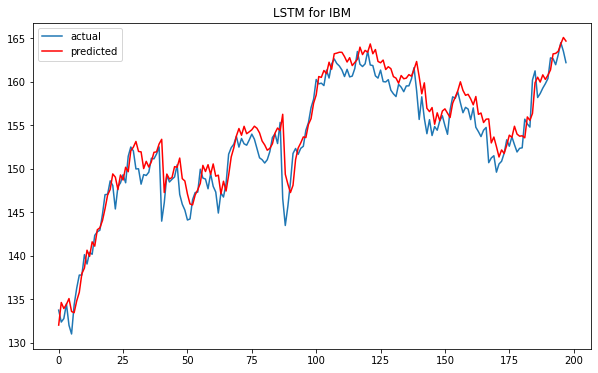

In [36]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=500, verbose=0)
test = test.reset_index(drop=True)

# Demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)
r2score = r2_score(y_test, yhat)
error = mean_squared_error(y_test, yhat)
ibm_mse.append(error)
ibm_r2score.append(r2score)
print('Test MSE: %.3f' % error)
print('Test R2-Score: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(y_test, label='actual')
plt.plot(yhat, color='red', label='predicted')   
ax.legend(loc='upper left')
plt.title('LSTM for IBM')
plt.show()

**Bidirectional LSTM**

Test MSE: 5.679
Test R2-Score: 0.887


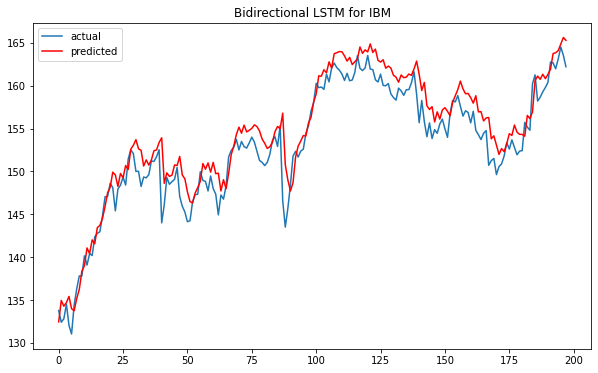

In [37]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=500, verbose=0)
test = test.reset_index(drop = True)

# Demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)
r2score = r2_score(y_test, yhat)
error = mean_squared_error(y_test, yhat)
ibm_mse.append(error)
ibm_r2score.append(r2score)
print('Test MSE: %.3f' % error)
print('Test R2-Score: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(y_test, label='actual')
plt.plot(yhat, color='red', label='predicted')
ax.legend(loc='upper left')
plt.title('Bidirectional LSTM for IBM')
plt.show()

#**Report MSE and R2-Score for above 6 models (3 classical and 3 ML based models) for IBM stock prediction**

In [41]:
t = PrettyTable(['IBM, Model ==>', 'ARIMA(2, 0, 0)', 'Auto-ARIMA', 'Auto-SARIMA', 'Simple-RNN', 'LSTM', 'Bidirectional-LSTM'])
t.add_row(['MSE', ibm_mse[0], ibm_mse[1], ibm_mse[2], ibm_mse[3], ibm_mse[4], ibm_mse[4]])
t.add_row(['R2-Score', ibm_r2score[0], ibm_r2score[1], ibm_r2score[2], ibm_r2score[3], ibm_r2score[4], ibm_r2score[4]])
print(t)

+----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| IBM, Model ==> |   ARIMA(2, 0, 0)   |     Auto-ARIMA     |    Auto-SARIMA     |     Simple-RNN     |        LSTM        | Bidirectional-LSTM |
+----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|      MSE       | 3.1064067780864737 | 3.265469517726079  | 3.215435509681383  | 3.7435848551197917 | 4.173091473157819  | 4.173091473157819  |
|    R2-Score    | 0.9455760394730759 | 0.9427892749306734 | 0.9436658661414696 | 0.9256841336479255 | 0.9171577725104739 | 0.9171577725104739 |
+----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+


#**[2] Analysis of APPLE dataset**


#**APPLE Stock prediction using ARIMA(2, 0, 0)**

#**APPLE Stock prediction using best ARIMA(1, 1, 1)**

#**APPLE Stock prediction using SARIMA**

#**APPLE Stock prediction using best SARIMA(1, 1, 1) and seasonality=12**

#**Prepare APPLE dataset for ML based predictions**

#**Report MSE and R2-Score for above 6 models (3 classical and 3 ML based models) for APPLE stock prediction**

# apple

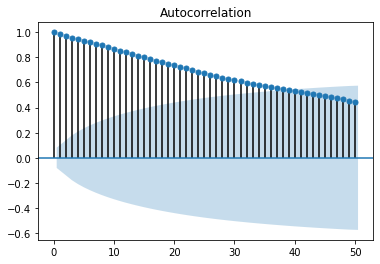

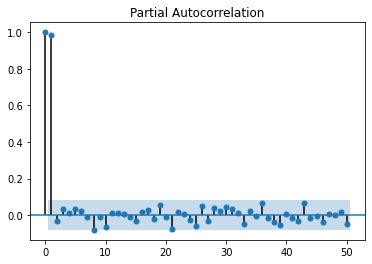

In [ ]:

plot_acf(aapl.Close,lags=50,use_vlines=True)
plt.show()

plot_pacf(aapl.Close,lags=50,use_vlines=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  Conv

Test MSE: 0.120
Test R2SCORE: 0.964


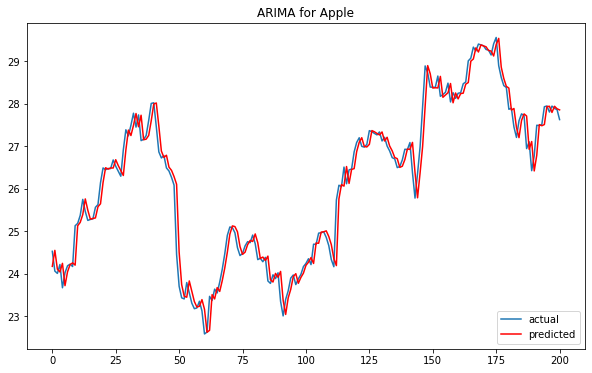

In [ ]:
X = aapl['Close'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
preds = []

for t in range(len(test)):
	model = ARIMA(history, order=(2,0,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	preds.append(yhat)
	obs = test[t]
	history.append(obs)



mse = mean_squared_error(test,preds)
r2score = r2_score(test,preds)
print('Test MSE: %.3f' % mse)
report_mse.append(mse)
report_r2score.append(r2score)
print('Test R2SCORE: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(test,label = 'actual')
plt.plot(preds, color='red',label = 'predicted')


   
ax.legend(loc='lower right')
plt.title('ARIMA for Apple')

plt.show()

In [ ]:
model_arima= auto_arima(train,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=5,max_q=5,
                   suppress_warnings=True,stepwise=False,seasonal=False)
                  
print(model_arima.summary())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=507.266, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=508.829, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=509.209, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=511.057, Time=0.25 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=512.601, Time=0.27 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=514.326, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=508.883, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=509.255, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=510.760, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=512.750, Time=0.47 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=514.447, Time=0.56 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=509.395, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=510.770, Time=0.35 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=512.137, Time=0.78 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=514.103, Time=1.20 sec
 ARIMA(3,1,0)(0,0,0)[0] i

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  Conv

Test MSE: 0.121
Test R2SCORE: 0.963


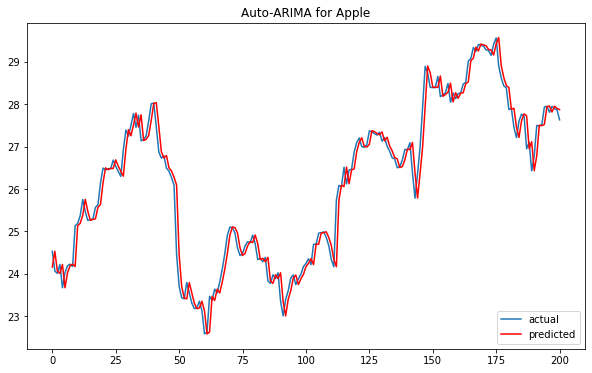

In [ ]:
X = aapl['Close'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
preds = []

for t in range(len(test)):
	model = ARIMA(history, order=(0,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	preds.append(yhat)
	obs = test[t]
	history.append(obs)



mse = mean_squared_error(test,preds)
r2score = r2_score(test,preds)
print('Test MSE: %.3f' % mse)
report_mse.append(mse)
report_r2score.append(r2score)
print('Test R2SCORE: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(test,label = 'actual')
plt.plot(preds, color='red',label = 'predicted')


   
ax.legend(loc='lower right')
plt.title('Auto-ARIMA for Apple')

plt.show()

In [ ]:
model_sarima= auto_arima(train,trace=True, error_action='ignore', 
                         start_p=0,start_q=2,max_p=5,max_q=5,m=12,
                   suppress_warnings=True,stepwise=True,seasonal=True)
print(model_sarima.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=512.853, Time=1.42 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=507.266, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=510.883, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=510.829, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=505.266, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=509.266, Time=0.26 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=509.266, Time=0.19 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=510.897, Time=0.83 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=508.883, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=508.829, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=509.255, Time=0.29 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 3.891 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 

Test MSE: 0.121
Test R2SCORE: 0.963


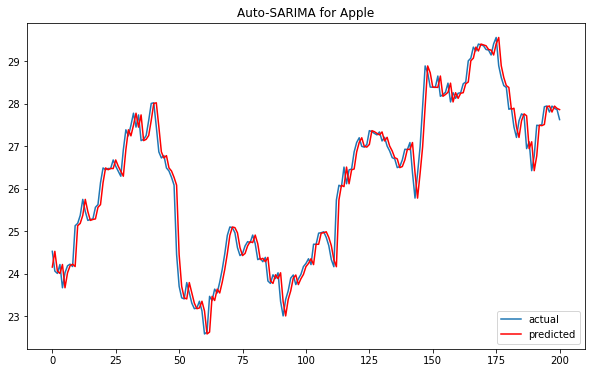

In [ ]:
X = aapl['Close'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
preds = []

for t in range(len(test)):
	model = SARIMAX(history, order=(0,1,0),seasonal_order=(0,0,0,12))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	preds.append(yhat)
	obs = test[t]
	history.append(obs)



mse = mean_squared_error(test,preds)
r2score = r2_score(test,preds)
print('Test MSE: %.3f' % mse)
report_mse.append(mse)
report_r2score.append(r2score)
print('Test R2SCORE: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(test,label = 'actual')
plt.plot(preds, color='red',label = 'predicted')


   
ax.legend(loc='lower right')
plt.title('Auto-SARIMA for Apple')

plt.show()

In [ ]:
print('mse for apple','-------------------','arima:',report_mse[3],'auto-arima:',report_mse[4],'auto-sarima',report_mse[5],sep='\n')

mse for apple
-------------------
arima:
0.12040678619674176
auto-arima:
0.12134588184947473
auto-sarima
0.12120100212924079


In [ ]:
print('r2score for apple','-------------------','arima:',report_r2score[3],'auto-arima:',report_r2score[4],'auto-sarima',report_r2score[5],sep='\n')

r2score for apple
-------------------
arima:
0.9635509732573175
auto-arima:
0.9632666942424747
auto-sarima
0.9633105516110174


**Simple RNN**

In [ ]:
size = int(len(aapl.Close) * 0.66)
train, test = aapl[0:size], aapl[size:len(X)]


def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):

		end_ix = i + n_steps
	
		if end_ix > len(sequence)-1:
			break

		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
 
raw_seq = aapl.Close

trainLen = 388
train = raw_seq[:trainLen]

test = raw_seq[trainLen:]
n_steps = 3

# split into samples
X, y = split_sequence(train, n_steps)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

Test MSE: 0.194
Test r2score: 0.941


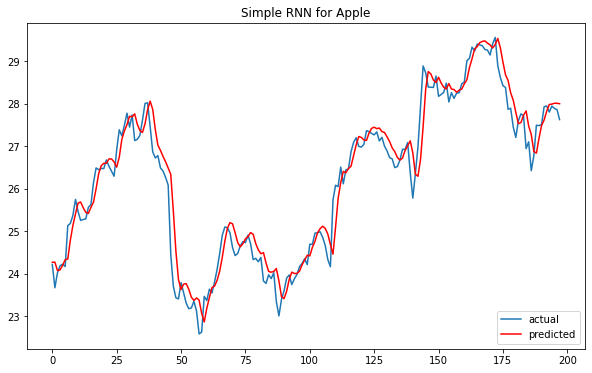

In [ ]:

model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=500, verbose=0)
test = test.reset_index(drop = True)

# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)
r2score = r2_score(y_test,yhat)
error = mean_squared_error(y_test, yhat)
report_ml_mse.append(error)
report_ml_r2score.append(r2score)
print('Test MSE: %.3f' % error)
print('Test r2score: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(y_test,label = 'actual')
plt.plot(yhat, color='red',label = 'predicted')


   
ax.legend(loc='lower right')

plt.title('Simple RNN for Apple')

plt.show()

Test MSE: 0.150
Test r2score: 0.955


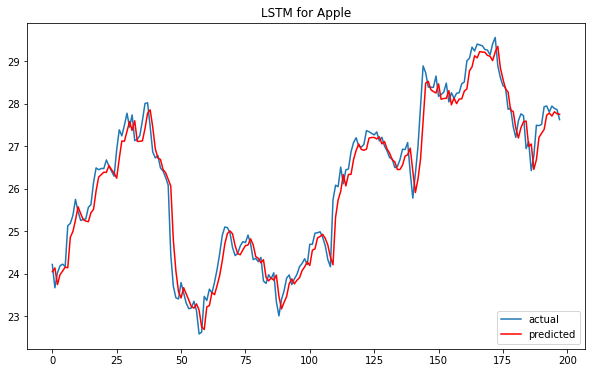

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=500, verbose=0)
test = test.reset_index(drop = True)

# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)
r2score = r2_score(y_test,yhat)
error = mean_squared_error(y_test, yhat)
report_ml_mse.append(error)
report_ml_r2score.append(r2score)
print('Test MSE: %.3f' % error)
print('Test r2score: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(y_test,label = 'actual')
plt.plot(yhat, color='red',label = 'predicted')


   
ax.legend(loc='lower right')

plt.title('LSTM for Apple')

plt.show()

Test MSE: 0.137
Test r2score: 0.959


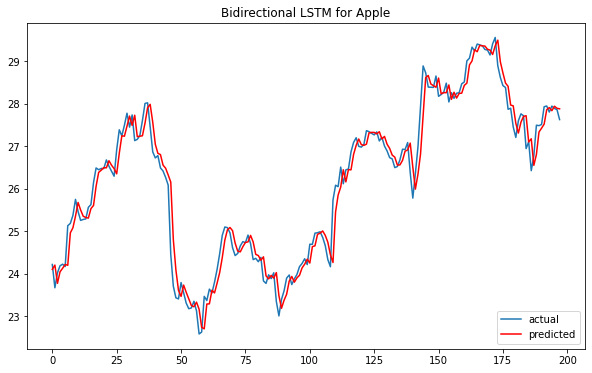

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=500, verbose=0)
test = test.reset_index(drop = True)

# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)
r2score = r2_score(y_test,yhat)
error = mean_squared_error(y_test, yhat)
report_ml_mse.append(error)
report_ml_r2score.append(r2score)
print('Test MSE: %.3f' % error)
print('Test r2score: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(y_test,label = 'actual')
plt.plot(yhat, color='red',label = 'predicted')


   
ax.legend(loc='lower right')

plt.title('Bidirectional LSTM for Apple')

plt.show()

In [ ]:
print('mse for apple','-------------------','simple rnn:',report_ml_mse[4],'lstm:',report_ml_mse[5],'bi-directional lstm:',report_ml_mse[6],sep='\n')

mse for apple
-------------------
simple rnn:
0.19372741218099654
lstm:
0.14953898969835075
bi-directional lstm:
0.13652538114575058


In [ ]:
print('r2score for apple','-------------------','simple rnn:',report_ml_r2score[3],'lstm:',report_ml_r2score[4],'bi-directional lstm:',report_ml_r2score[5],sep='\n')

r2score for apple
-------------------
simple rnn:
0.9411686132680794
lstm:
0.9545878095649938
bi-directional lstm:
0.9585397987487473


# facebook

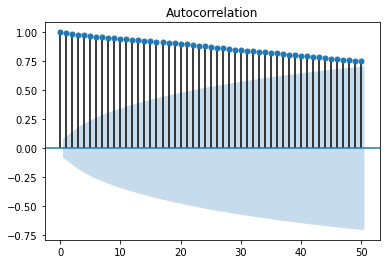

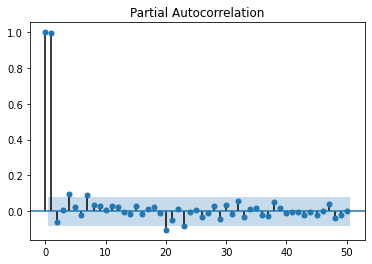

In [ ]:

plot_acf(fb.Close,lags=50,use_vlines=True)
plt.show()

plot_pacf(fb.Close,lags=50,use_vlines=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Test MSE: 2.505
Test R2SCORE: 0.952


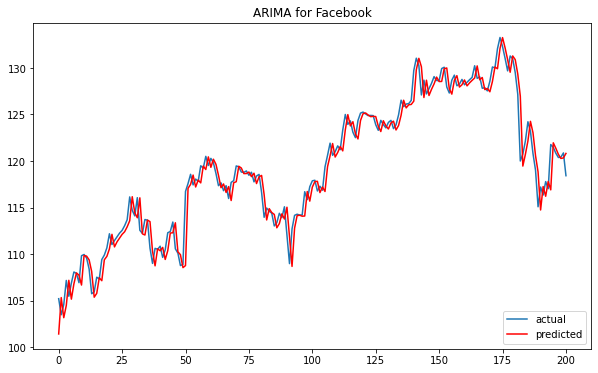

In [ ]:
X = fb['Close'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
preds = []

for t in range(len(test)):
	model = ARIMA(history, order=(2,0,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	preds.append(yhat)
	obs = test[t]
	history.append(obs)



mse = mean_squared_error(test,preds)
r2score = r2_score(test,preds)
print('Test MSE: %.3f' % mse)
report_mse.append(mse)
report_r2score.append(r2score)
print('Test R2SCORE: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(test,label = 'actual')
plt.plot(preds, color='red',label = 'predicted')


   
ax.legend(loc='lower right')
plt.title('ARIMA for Facebook')

plt.show()

In [ ]:
model_arima= auto_arima(train,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=5,max_q=5,
                   suppress_warnings=True,stepwise=False,seasonal=False)
                  
print(model_arima.summary())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1504.184, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1503.818, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1505.701, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1497.046, Time=0.17 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1497.171, Time=0.21 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1499.158, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1503.808, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1505.796, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1495.731, Time=0.70 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1494.303, Time=0.46 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1493.104, Time=0.73 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1505.753, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1494.987, Time=0.52 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1499.489, Time=0.62 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1494.889, Time=0.81 sec
 ARIMA(3,1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

Test MSE: 2.482
Test R2SCORE: 0.952


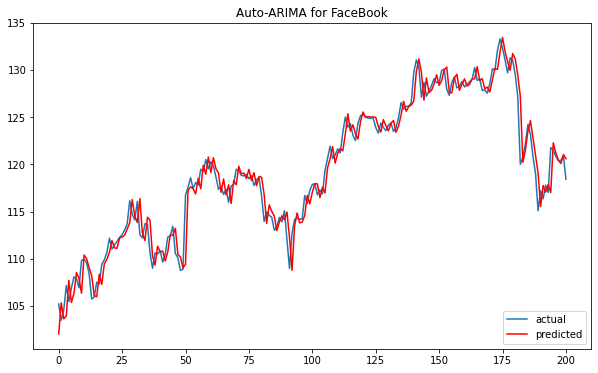

In [ ]:
X = fb['Close'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
preds = []

for t in range(len(test)):
	model = ARIMA(history, order=(1,1,4))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	preds.append(yhat)
	obs = test[t]
	history.append(obs)



mse = mean_squared_error(test,preds)
r2score = r2_score(test,preds)
print('Test MSE: %.3f' % mse)
report_mse.append(mse)
report_r2score.append(r2score)
print('Test R2SCORE: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(test,label = 'actual')
plt.plot(preds, color='red',label = 'predicted')


   
ax.legend(loc='lower right')
plt.title('Auto-ARIMA for FaceBook')

plt.show()

In [ ]:
model_sarima= auto_arima(train,trace=True, error_action='ignore', 
                         start_p=0,start_q=2,max_p=5,max_q=5,m=12,
                   suppress_warnings=True,stepwise=True,seasonal=True)
print(model_sarima.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=1509.657, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1504.184, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1505.747, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1505.749, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1502.966, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1506.121, Time=0.17 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1506.122, Time=0.14 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1508.120, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1503.808, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1503.818, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1505.796, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.925 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:      

Test MSE: 2.444
Test R2SCORE: 0.953


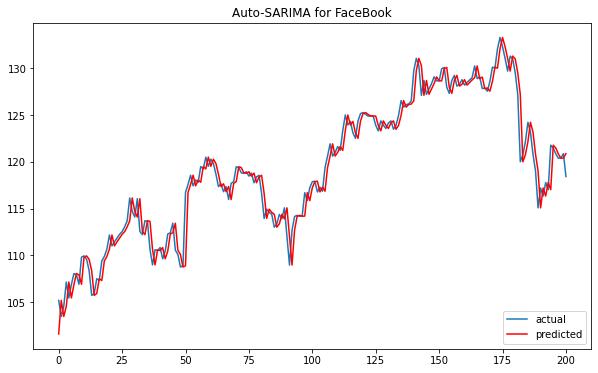

In [ ]:
X = fb['Close'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
preds = []

for t in range(len(test)):
	model = SARIMAX(history, order=(0,1,0),seasonal_order=(0,0,0,12))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	preds.append(yhat)
	obs = test[t]
	history.append(obs)



mse = mean_squared_error(test,preds)
r2score = r2_score(test,preds)
print('Test MSE: %.3f' % mse)
report_mse.append(mse)
report_r2score.append(r2score)
print('Test R2SCORE: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(test,label = 'actual')
plt.plot(preds, color='red',label = 'predicted')


   
ax.legend(loc='lower right')
plt.title('Auto-SARIMA for FaceBook')

plt.show()

In [ ]:
print('mse for facebook','-------------------','arima:',report_mse[6],'auto-arima:',report_mse[7],'auto-sarima:',report_mse[8],sep='\n')

mse for facebook
-------------------
arima:
2.5054716862149022
auto-arima:
2.4815106978078942
auto-sarima:
2.4437243124123746


In [ ]:
print('r2score for facebook','-------------------','arima:',report_r2score[6],'auto-sarima:',report_r2score[7],'auto-sarima:',report_r2score[8],sep='\n')

r2score for facebook
-------------------
arima:
0.9515011228715777
auto-sarima:
0.9519649401396079
auto-sarima:
0.9526963781648339


**simple RNN**

In [ ]:
size = int(len(fb.Close) * 0.66)
train, test = fb[0:size], fb[size:len(X)]
len(train)

def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):

		end_ix = i + n_steps
	
		if end_ix > len(sequence)-1:
			break

		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
 
raw_seq = fb.Close

trainLen = 388
train = raw_seq[:trainLen]

test = raw_seq[trainLen:]
n_steps = 3

# split into samples
X, y = split_sequence(train, n_steps)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

Test MSE: 6.582
Test r2score: 0.866


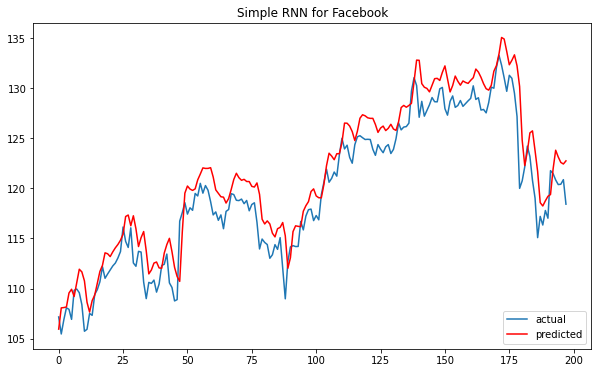

In [ ]:

model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=500, verbose=0)
test = test.reset_index(drop = True)

# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)
r2score = r2_score(y_test,yhat)
error = mean_squared_error(y_test, yhat)
report_ml_mse.append(error)
report_ml_r2score.append(r2score)
print('Test MSE: %.3f' % error)
print('Test r2score: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(y_test,label = 'actual')
plt.plot(yhat, color='red',label = 'predicted')


   
ax.legend(loc='lower right')

plt.title('Simple RNN for Facebook')

plt.show()

**LSTM**

Test MSE: 2.436
Test r2score: 0.950


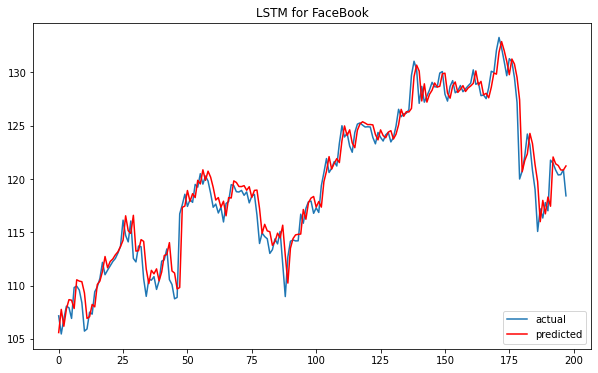

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=500, verbose=0)
test = test.reset_index(drop = True)

# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)
r2score = r2_score(y_test,yhat)
error = mean_squared_error(y_test, yhat)
report_ml_mse.append(error)
report_ml_r2score.append(r2score)
print('Test MSE: %.3f' % error)
print('Test r2score: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(y_test,label = 'actual')
plt.plot(yhat, color='red',label = 'predicted')


   
ax.legend(loc='lower right')

plt.title('LSTM for FaceBook')

plt.show()

**BiDirectional LSTM**

Test MSE: 2.575
Test r2score: 0.948


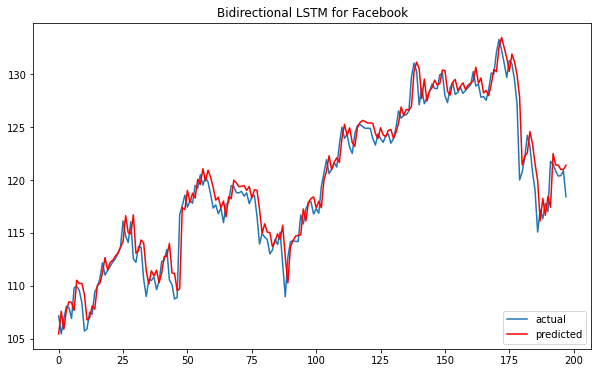

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=500, verbose=0)
test = test.reset_index(drop = True)

# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)
r2score = r2_score(y_test,yhat)
error = mean_squared_error(y_test, yhat)
report_ml_mse.append(error)
report_ml_r2score.append(r2score)
print('Test MSE: %.3f' % error)
print('Test r2score: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(y_test,label = 'actual')
plt.plot(yhat, color='red',label = 'predicted')


   
ax.legend(loc='lower right')

plt.title('Bidirectional LSTM for Facebook')

plt.show()

In [ ]:
print('mse for facebook','-------------------','simple rnn:',report_ml_mse[7],'lstm:',report_ml_mse[8],'bi-directional lstm:',report_ml_mse[9],sep='\n')

mse for facebook
-------------------
simple rnn:
6.58189014124483
lstm:
2.4355507069202655
bi-directional lstm:
2.5748700379115306


In [ ]:
print('r2score for facebook','-------------------','simple rnn:',report_ml_r2score[6],'lstm:',report_ml_r2score[7],'bi-directional lstm:',report_ml_r2score[8],sep='\n')

r2score for facebook
-------------------
simple rnn:
0.8658023697720227
lstm:
0.9503417519656506
bi-directional lstm:
0.9475011812993589


# Google

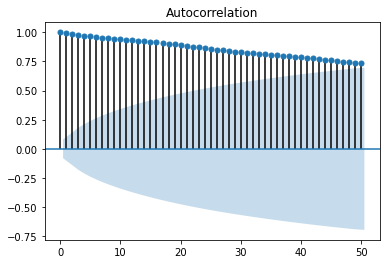

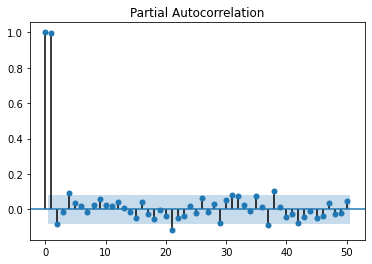

In [ ]:

plot_acf(googl.Close,lags=50,use_vlines=True)
plt.show()

plot_pacf(googl.Close,lags=50,use_vlines=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  Conv

Test MSE: 77.252
Test R2SCORE: 0.943


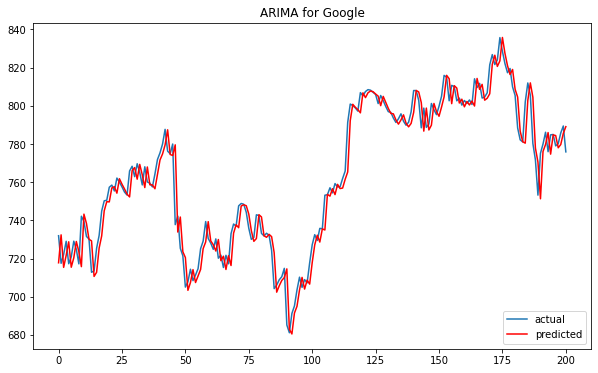

In [ ]:
X = googl['Close'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
preds = []

for t in range(len(test)):
	model = ARIMA(history, order=(2,0,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	preds.append(yhat)
	obs = test[t]
	history.append(obs)



mse = mean_squared_error(test,preds)
r2score = r2_score(test,preds)
print('Test MSE: %.3f' % mse)
report_mse.append(mse)
report_r2score.append(r2score)
print('Test R2SCORE: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(test,label = 'actual')
plt.plot(preds, color='red',label = 'predicted')


   
ax.legend(loc='lower right')
plt.title('ARIMA for Google')

plt.show()

In [ ]:
model_arima= auto_arima(train,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=5,max_q=5,
                   suppress_warnings=True,stepwise=False,seasonal=False)
                  
print(model_arima.summary())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2926.521, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2925.751, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2927.520, Time=0.20 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2926.729, Time=0.29 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2927.266, Time=0.34 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2928.438, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2925.684, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2927.684, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2926.627, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2925.527, Time=0.40 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2927.526, Time=0.55 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2927.684, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2929.308, Time=0.42 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2926.416, Time=0.65 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2927.526, Time=0.46 sec
 ARIMA(3,1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

Test MSE: 76.718
Test R2SCORE: 0.944


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


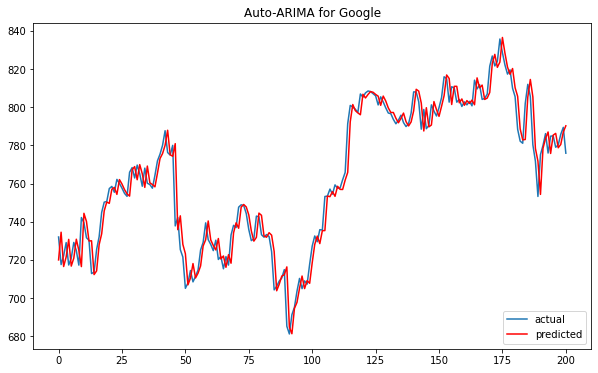

In [ ]:
X = googl['Close'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
preds = []

for t in range(len(test)):
	model = ARIMA(history, order=(1,1,3))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	preds.append(yhat)
	obs = test[t]
	history.append(obs)



mse = mean_squared_error(test,preds)
r2score = r2_score(test,preds)
print('Test MSE: %.3f' % mse)
report_mse.append(mse)
report_r2score.append(r2score)
print('Test R2SCORE: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(test,label = 'actual')
plt.plot(preds, color='red',label = 'predicted')


   
ax.legend(loc='lower right')
plt.title('Auto-ARIMA for Google')

plt.show()

In [ ]:
model_sarima= auto_arima(train,trace=True, error_action='ignore', 
                         start_p=0,start_q=2,max_p=5,max_q=5,m=12,
                   suppress_warnings=True,stepwise=True,seasonal=True)
print(model_sarima.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=2931.407, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2926.521, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2927.564, Time=0.46 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2927.624, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2925.001, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2928.347, Time=0.21 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2928.342, Time=0.17 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2930.337, Time=0.61 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2925.684, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2925.751, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2927.684, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 3.543 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:      

Test MSE: 75.924
Test R2SCORE: 0.944


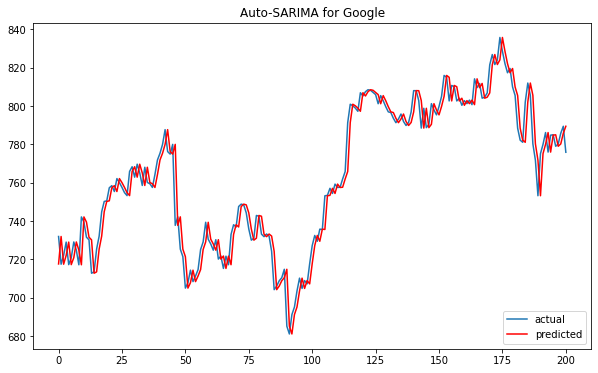

In [ ]:
X = googl['Close'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
preds = []

for t in range(len(test)):
	model = SARIMAX(history, order=(0,1,0),seasonal_order=(0,0,0,12))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	preds.append(yhat)
	obs = test[t]
	history.append(obs)



mse = mean_squared_error(test,preds)
r2score = r2_score(test,preds)
print('Test MSE: %.3f' % mse)
report_mse.append(mse)
report_r2score.append(r2score)
print('Test R2SCORE: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(test,label = 'actual')
plt.plot(preds, color='red',label = 'predicted')


   
ax.legend(loc='lower right')
plt.title('Auto-SARIMA for Google')

plt.show()

In [ ]:
print('mse for google','-------------------','arima:',report_mse[9],'auto-arima:',report_mse[10],'auto-sarima:',report_mse[11],sep='\n')

mse for google
-------------------
arima:
77.25219571602283
auto-arima:
76.71774537535185
auto-sarima:
75.92434570549139


In [ ]:
print('r2score for google','-------------------','arima:',report_r2score[9],'auto-arima:',report_r2score[10],'auto-sarima:',report_r2score[11],sep='\n')

r2score for google
-------------------
arima:
0.9432688020900606
auto-arima:
0.9436612829479653
auto-sarima:
0.9442439267586084


**Simple RNN**

In [ ]:
size = int(len(googl.Close) * 0.66)
train, test = googl[0:size], googl[size:len(X)]
len(train)

def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):

		end_ix = i + n_steps
	
		if end_ix > len(sequence)-1:
			break

		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
 
raw_seq = googl.Close

trainLen = 388
train = raw_seq[:trainLen]

test = raw_seq[trainLen:]
n_steps = 3

# split into samples
X, y = split_sequence(train, n_steps)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

Test MSE: 113.263
Test r2score: 0.917


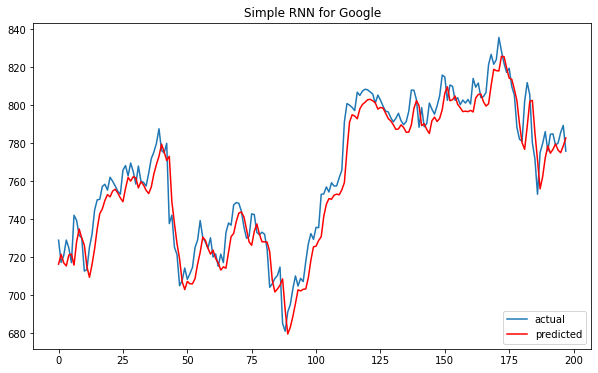

In [ ]:

model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=500, verbose=0)
test = test.reset_index(drop = True)

# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)
r2score = r2_score(y_test,yhat)
error = mean_squared_error(y_test, yhat)
report_ml_mse.append(error)
report_ml_r2score.append(r2score)
print('Test MSE: %.3f' % error)
print('Test r2score: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(y_test,label = 'actual')
plt.plot(yhat, color='red',label = 'predicted')


   
ax.legend(loc='lower right')

plt.title('Simple RNN for Google')

plt.show()

**LSTM**

Test MSE: 107.521
Test r2score: 0.921


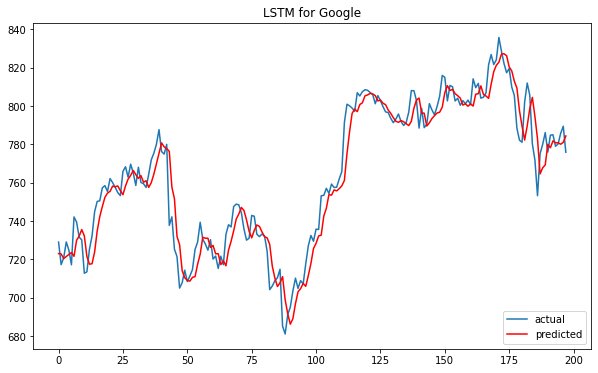

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=500, verbose=0)
test = test.reset_index(drop = True)

# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)
r2score = r2_score(y_test,yhat)
error = mean_squared_error(y_test, yhat)
report_ml_mse.append(error)
report_ml_r2score.append(r2score)
print('Test MSE: %.3f' % error)
print('Test r2score: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(y_test,label = 'actual')
plt.plot(yhat, color='red',label = 'predicted')


   
ax.legend(loc='lower right')

plt.title('LSTM for Google')

plt.show()

**Bidirectional LSTM**

Test MSE: 96.238
Test r2score: 0.929


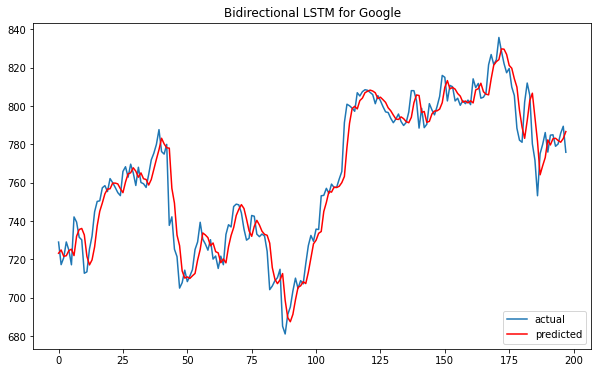

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=500, verbose=0)
test = test.reset_index(drop = True)

# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)
r2score = r2_score(y_test,yhat)
error = mean_squared_error(y_test, yhat)
report_ml_mse.append(error)
report_ml_r2score.append(r2score)
print('Test MSE: %.3f' % error)
print('Test r2score: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
plt.plot(y_test,label = 'actual')
plt.plot(yhat, color='red',label = 'predicted')


   
ax.legend(loc='lower right')

plt.title('Bidirectional LSTM for Google')

plt.show()

In [ ]:
print('mse for google','-------------------','simple rnn:',report_ml_mse[10],'lstm:',report_ml_mse[11],'bi-directional lstm:',report_ml_mse[12],sep='\n')

mse for google
-------------------
simple rnn:
113.26348890253163
lstm:
107.5210445990993
bi-directional lstm:
96.23780074832264


In [ ]:
print('r2score for google','-------------------','simple rnn:',report_ml_r2score[9],'lstm:',report_ml_r2score[10],'bi-directional lstm:',report_ml_r2score[11],sep='\n')

r2score for google
-------------------
simple rnn:
0.9165436663106832
lstm:
0.9207748916828062
bi-directional lstm:
0.9290887638143516
